## Assignment 1

In [1]:
cd D:\STAT5102\Assignment 1

D:\STAT5102\Assignment 1


In [2]:
import pandas as pd
import warnings
from IPython.display import Image
from pylab import rcParams
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 16, 9
#np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.6f}'.format
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [78]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import summary_table, OLSInfluence
from scipy.stats import t, norm, chi2, f
from sklearn.preprocessing import StandardScaler
import STAT5102_2023 as stat

In [4]:
def cal_corrcoef(data):
    if isinstance(data, pd.DataFrame):
        return data.corr().values[0,1]
    else:
        return np.corrcoef(data,rowvar=False)[0,1]

In [5]:
def t_test_for_reg(model,var,test_value,alternative='two-side'):
    T = (model.params.loc[var]-test_value)/model.bse.loc[var]
    if alternative=='greater':
        return 'p-value: '+str(1-t.cdf(T,model.df_resid))
    elif alternative=='less':
        return 'p-value: '+str(t.cdf(T,model.df_resid))
    else:
        return 'p-value: '+str(2*(1-t.cdf(np.abs(T),model.df_resid)))

### Question 1


One may wonder if people of similar heights tend to marry each other. For this purpose, a sample of newly married couples was selected. Let $X$ be the height of the husband and $Y$ be the height of the wife. The heights (in cm) of husbands and wives are found in 'HW_heights.csv'.

In [6]:
HW = pd.read_csv('HW_heights.csv')

In [7]:
HW.tail()

,HH,WH
91,173,161
92,164,146
93,181,168
94,187,178
95,181,170


(a)	Compute the covariance and correlation coefficient between the heights of the husbands and wives.

In [9]:
#correlation coefficient


0.7633863969860966

In [10]:
#covariance


69.41293859649123

(b)	What would the covariance and correlation coefficient be if heights were measured in inches rather than in cm? Describe your observations.

Since 1 inches = 2.54 cm, we convert the data to inches.

In [12]:
HW['HH_in_inches'] = HW.HH/2.54
HW['WH_in_inches'] = HW.WH/2.54

In [13]:
#correlation coefficient


0.763386396986097

In [14]:
#covariance


10.759027000510141

Observations:




(c)	What would the correlation coefficient be if every man married a woman exactly 5 cm shorter than him?

Answer is 

(d)	We wish to fit a regression model relating the heights of husbands and wives. Give a scatter plot between heights of wives (x-axis) and heights of husbands (y-axis). Describe your observations.

Text(0.5, 1.0, 'A scatter plot between Heights of Husbands and Heights of Wives')

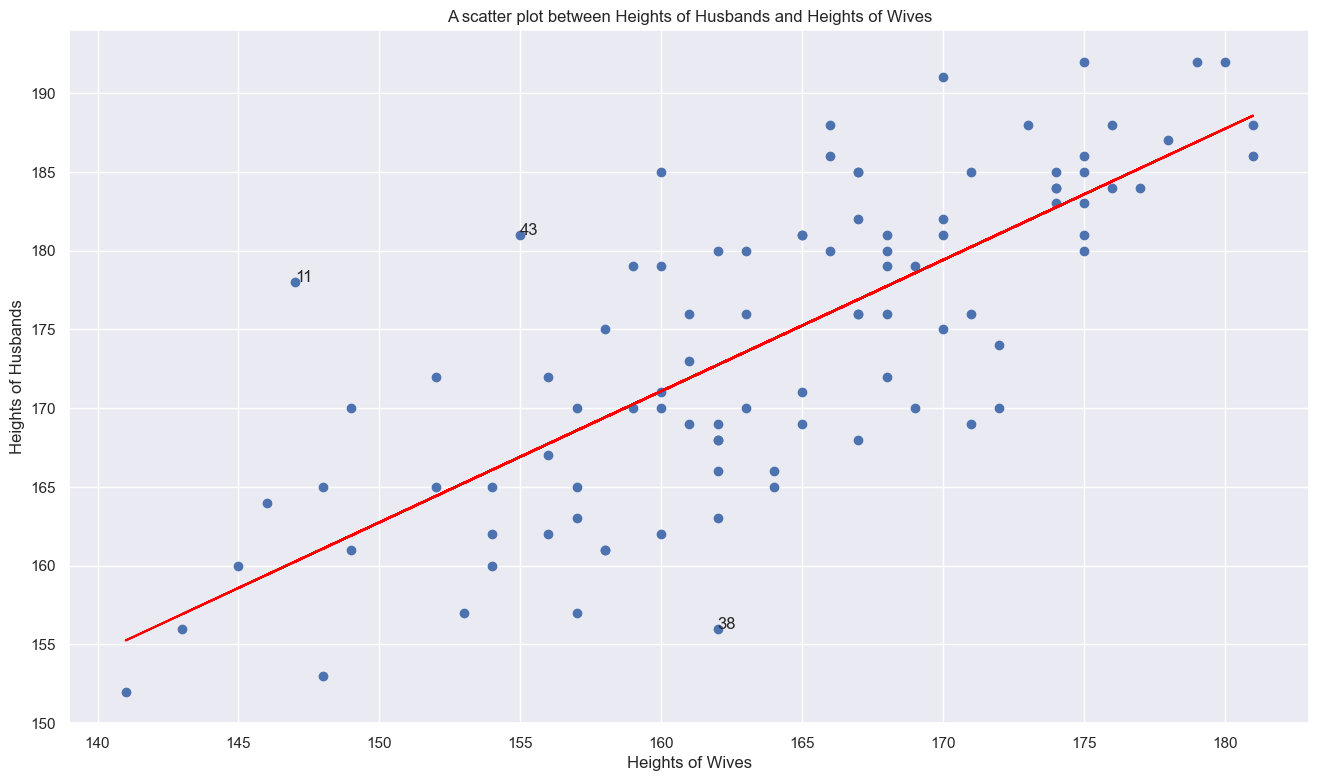

In [15]:
m, b = np.polyfit(HW.WH, HW.HH, 1)
e = HW.HH - m*HW.WH - b
labels = range(_______)
e = e.values
Y = HW.HH.values
X = HW.WH.values
lpf = [labels[x] for x in np.argsort(np.abs(e))]
erf = [X[x] for x in np.argsort(np.abs(e))]
spf = [Y[x] for x in np.argsort(np.abs(e))]
plt.scatter(____, _____)
plt.plot(X,m*X+b,color='red')
plt.xlabel('Heights of Wives')
plt.ylabel('Heights of Husbands')
for c in range(1,4):
    plt.annotate(lpf[-c], (erf[-c], spf[-c]))
plt.title('A scatter plot between Heights of Husbands and Heights of Wives')

Observations:




(e)	Fit a regression line to the data. Use Heights of Husbands as response. Write down the fitted regression line and Describe the fitness of the regression line.

In [21]:
#Use Heights of Husbands as response

print(lm_HH.summary())

                            OLS Regression Results                            
Dep. Variable:                     HH   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     131.3
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.54e-19
Time:                        10:30:16   Log-Likelihood:                -314.43
No. Observations:                  96   AIC:                             632.9
Df Residuals:                      94   BIC:                             638.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.8100     11.932      3.169      0.0

Fitness of the regression line:




Using HH as response, the fitted regression line is




(f)	Test the null hypothesis that the slope of the fitted regression line is zero. State the alternative. Give an interpretation.

In [24]:
t_test_for_reg(lm_HH,______,________,alternative='greater')

'p-value: 0.0'

Comment:

(g)	Give comments on the normality of the residuals.

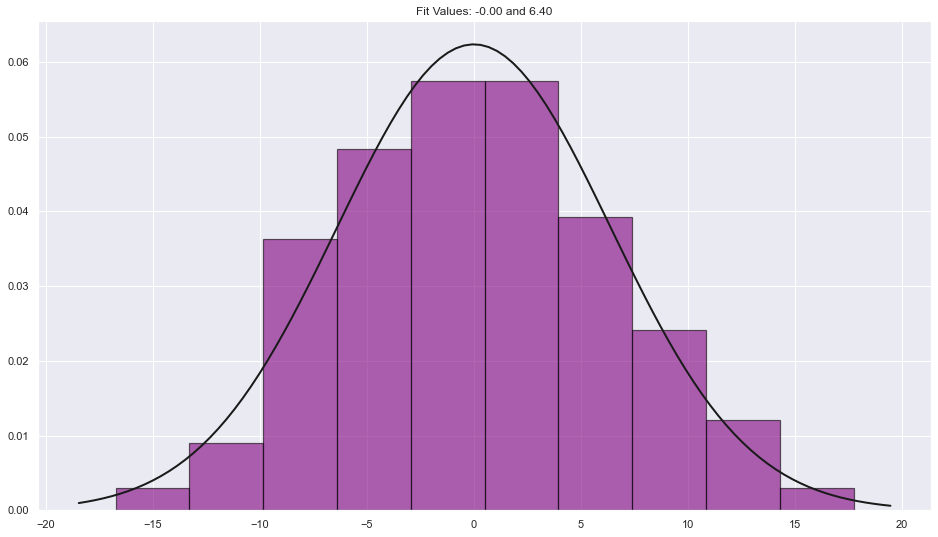

In [25]:
mu, std = norm.fit(lm_HH.resid) 

# Plot the histogram of residuals.
plt.hist(_______, bins=10, density=True, alpha=0.6, color='purple',edgecolor='black', linewidth=1.2)
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = 
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

In [26]:
shapiro_test = stats.shapiro(lm_HH.resid)
#Shapiro test statistic, p-value
shapiro_test

ShapiroResult(statistic=0.9941306114196777, pvalue=0.9534016251564026)

### Question 2



The data in 'Resistance_of_rubber.csv' come from an experiment to investigate how the resistance of rubber to abrasion is affected by various factors. Each of 30 samples of rubber was tested for hardness (measured in degrees Shore: the larger the number, the harder the rubber), and was then subjected to steady abrasion for a fixed time. The weight loss due to abrasion was measured in grams per hour.

In [16]:
RR = pd.read_csv('Resistance_of_rubber.csv')
RR.tail()

,Abrasion,Hardness
25,340,59
26,283,65
27,267,74
28,215,81
29,148,86


(a)	Produce a scatter plot of Abrasion loss versus Hardness. Does the plot suggest a linear relationship between Abrasion loss and Hardness?

Text(0.5, 1.0, 'A scatter plot of Abrasion loss versus Hardness')

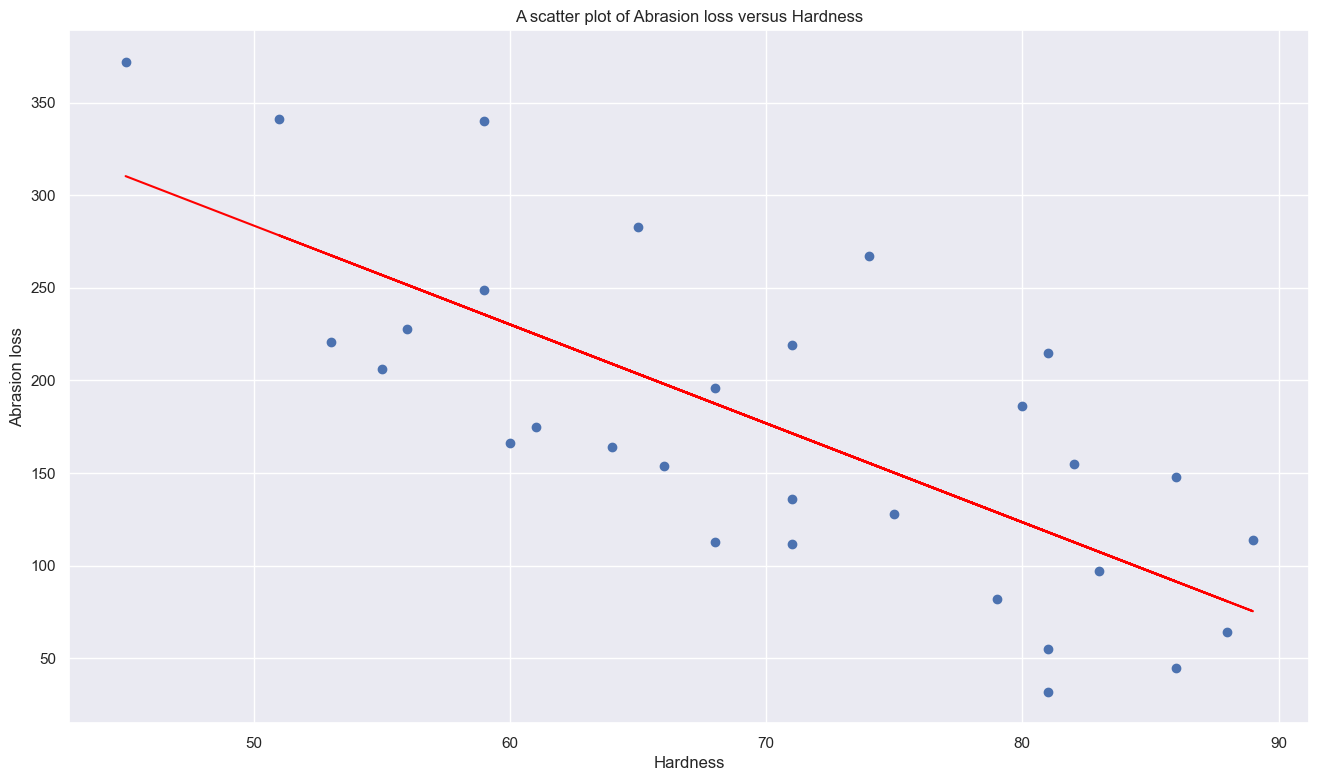

In [17]:
m, b = np.polyfit(RR['Hardness'], RR['Abrasion'], 1)
plt.scatter(________,_________)
plt.plot(____________,______________,color='red')
plt.xlabel('Hardness')
plt.ylabel('Abrasion loss')
plt.title('A scatter plot of Abrasion loss versus Hardness')

Hardness and Abrasion loss have a negative linear relationship.

(b)	Fit a regression line predicting Abrasion loss from Hardness. Write down the fitted regression line.

In [18]:
#Use Abrasion as response

print(lm_RR.summary())

                            OLS Regression Results                            
Dep. Variable:               Abrasion   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     33.43
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           3.29e-06
Time:                        09:36:04   Log-Likelihood:                -164.62
No. Observations:                  30   AIC:                             333.2
Df Residuals:                      28   BIC:                             336.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    550.4151     65.787      8.367      0.0

The fitted regression line is



(c)	Obtain a 98% confidence interval for 𝜇 and 𝛽

,0,1
Intercept,388.110190,712.720069
Hardness,-7.613582,-3.059524


The $98\%$ confidence interval for $\mu$ is ______________.


The $98\%$ confidence interval for $\beta$ is ______________.

(d)	Is there a significant relationship between Hardness and Abrasion loss? Justify your answer by a statistical test. Indicate what hypothesis you are testing and your conclusion.

In [20]:
t_test_for_reg(__________,___________,________________)

'p-value: 3.294488624128178e-06'

(e)	What proportion of the variability in Abrasion loss is accounted for by Hardness?

0.5442171165934175

Since $R^{2}=$,

(f)	Provide an interval estimate (based on $95\%$ level) for the **average** Abrasion loss with $70$ degree Shore Hardness.

In [22]:
test = pd.DataFrame(________________________)
test

,Abrasion,Hardness
0,NaN,70


In [23]:

predictions.summary_frame(0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,176.856414,11.052214,154.216979,199.495849,50.835625,302.877203


The $95\%$ confidence interval for the average Abrasion loss is _________________________.

(g)	Provide a prediction interval (based on 95% level) for the Abrasion loss with $70$ degree Shore Hardness. How does this interval differ from that given in part (f).

The $95\%$ prediction interval for the predicted Abrasion loss is ________________________. The prediction interval for individual response is ___________ than that for the mean Abrasion loss, reflecting a _________________ for the individual response.

(h)	Provide an interval estimate (based on $95\%$ level) for the **average** Abrasion loss with 110 degree Shore Hardness. How does this interval compare with the one given in (f)? Comment on the prediction.

In [24]:
test2 = pd.DataFrame(_________________________)
test2

,Abrasion,Hardness
0,NaN,110


In [25]:

predictions.summary_frame(0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-36.605709,38.300082,-115.059870,41.848453,-183.315459,110.104041


The $95\%$ prediction interval for the predicted Abrasion loss is ___________________. Note that the Abrasion loss is a positive value. We may use ___________________.

Comment:

### Question 3


Let $Y$ and $X$ denote the labor force participation rate of women in 1972 and 1968, respectively, in each of 19 cities in the United States. The regression output for this data is shown in the following table

$$\begin{array}{lcccc}
\hline
\text{Variable}&\text{Coefficient}&\text{s.e.}&\text{t-Test}&\text{p-value}\\
\hline
\text{Constant}&0.203311&0.0976&2.08&0.0526\\
X&0.65604&0.1961&3.35&<0.0038\\
\hline
n=19&R^{2}=0.397&R_{a}^{2}=0.362&\hat{\sigma}=0.0566&\text{df}=17\\
\hline
\end{array}$$

It was also found that $SSR = 0.0358$ and $SSE = 0.0544$. Suppose that the model $Y = \beta_{0}+\beta_{1}X + \varepsilon$ satisfies the usual regression assumptions.

(a) Compute $Var(Y)$ and $Cor(X,Y)$.

(b) Suppose that the participation rate of women in 1968 in a given city is $45\%$. What is the estimated participation rate of women in 1972 for the same city?

(c) Suppose further that the mean and variance of the participation rate of women in 1968 are 0.5 and 0.005, respectively. Construct a $95\%$ confidence interval for the estimate in (b).

In [26]:
t.ppf(0.975,17)

2.1098155778331806

(d) Construct a $95\%$ confidence interval for the slope of the true regression line, $\beta_{1}$.

(e) Test the hypothesis $H_{0}: \beta_{1}=1$ versus $H_{1}:\beta_{1}>1$ at the $95\%$ significance level.

In [27]:
1-t.cdf(-1.7542,17)

0.9512982906965621

(f) If $Y$ and $X$ were reversed in the above regression, what would you expect $R^{2}$ to be?

### Question 4



The question investigates the relationship between Sales and TV advertising expense. The data is given in 'AdvertisingTV.csv'.

In [28]:
TV = pd.read_csv('AdvertisingTV.csv')
TV.tail()

,TV,Sales
195,38.200000,7.600000
196,94.200000,9.700000
197,177.000000,12.800000
198,283.600000,25.500000
199,232.100000,13.400000


(a) Give a scatter plot of Sales versus TV. What are your observations?

In [29]:
TV = TV.sort_values(by=['TV'])

Text(0.5, 1.0, 'A scatter plot of Sales versus TV expense')

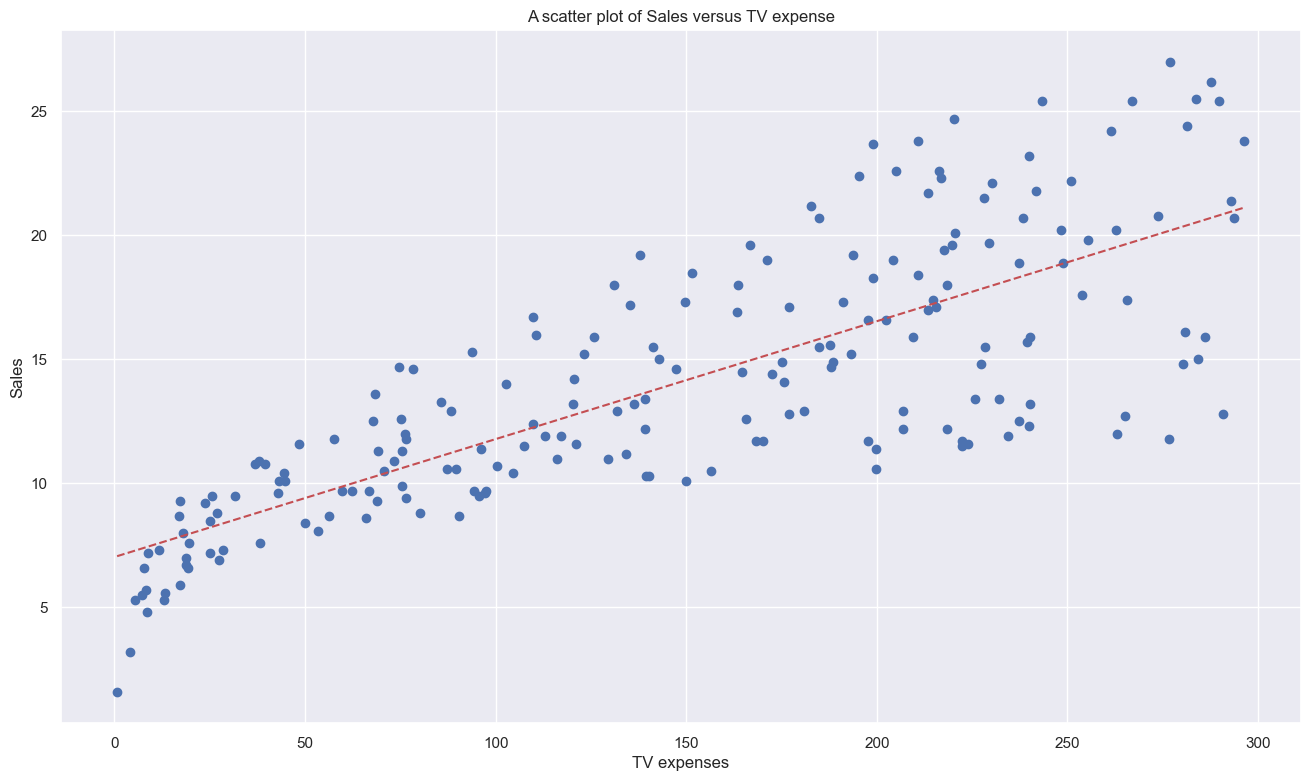

In [30]:
b1,b0 = np.polyfit(TV.TV, TV.Sales, 1)
plt.scatter(______,_______)
plt.plot(________,________,'r--')
plt.xlabel('TV expenses')
plt.ylabel('Sales')
plt.title('A scatter plot of Sales versus TV expense')

Observations



(b) Take the log-transformation of Sales. What is the reason why we do this? Give a scatter plot between TV expenses and ln(Sales). What do you observe?

In [31]:
TV['lnSales'] = np.log(TV.Sales)

Text(0.5, 1.0, 'A scatter plot of logSales versus TV expense')

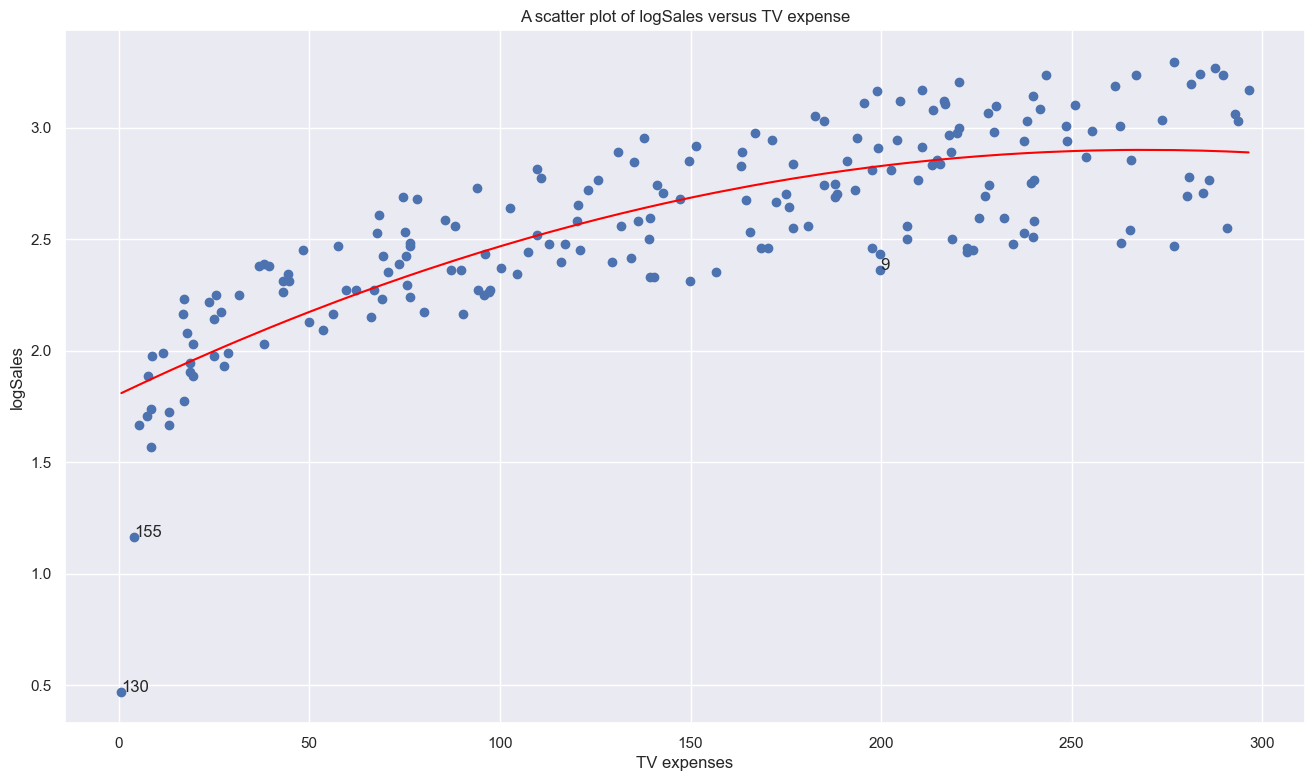

In [32]:
b2,b1,b0 = np.polyfit(______, _________, _______)
e = 
labels = TV.index
e = e.values
X = 
Y = 
lpf = [labels[x] for x in np.argsort(np.abs(e))]
erf = [X[x] for x in np.argsort(np.abs(e))]
spf = [Y[x] for x in np.argsort(np.abs(e))]
plt.scatter(____,______)
plt.plot(_____,________,color='red')
plt.xlabel('TV expenses')
plt.ylabel('logSales')
for c in range(1,4):
    plt.annotate(lpf[-c], (erf[-c], spf[-c]))
plt.title('A scatter plot of logSales versus TV expense')

Observations:





(c) Fit a quadratic regression line of lnSales (Response) on TV expenses. Does the outliers affect the regression line? What is your suggestion?

records _________ and ________ are outliers.

Suppose that we remove the outliers from the data and refit the regression line.

Text(0.5, 1.0, 'A scatter plot of logSales versus TV expense')

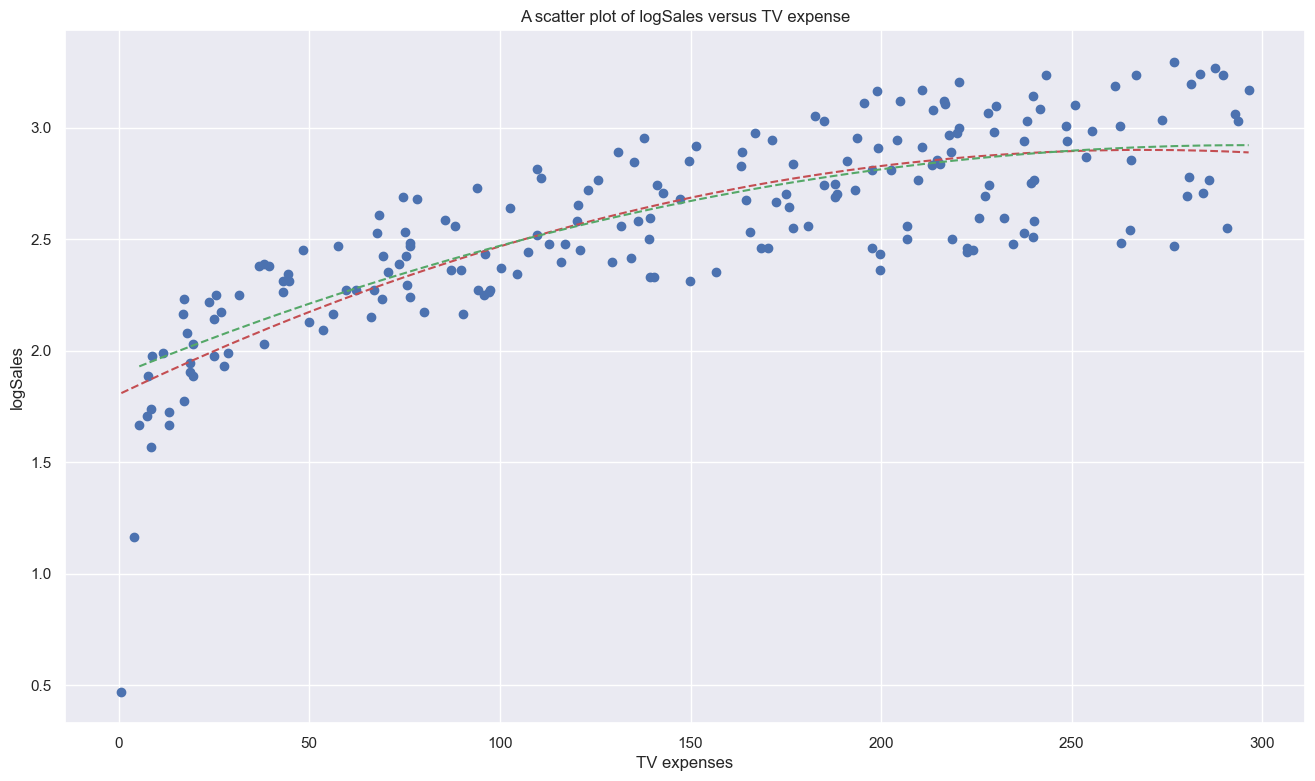

In [35]:
b2,b1,b0 = np.polyfit(______, ________, ______)
b21,b11,b01 = np.polyfit(_______,______,_______)
plt.scatter(______,_______)
plt.plot(______,_____________,'r--')
plt.plot(_______,____________,'g--')
plt.xlabel('TV expenses')
plt.ylabel('logSales')
plt.title('A scatter plot of logSales versus TV expense')

The green dash line is the regression line of Sales on TV expenses after removing the outliers. The red dash line is the regression line of Sales on TV expenses using the full data. 

Observation:



Suggestion:

(d) Remove the outliers from the data. To do a regression of logSales on TV advertising expenses, explain why we need to standardize the predictor variable TV expenses.

Objectives to standardize TV expenses:



In [36]:
scaler = StandardScaler()
TV2['TV_scaled'] = scaler.fit_transform(________________)

Text(0.5, 1.0, 'A scatter plot of logSales versus TV expense scaled')

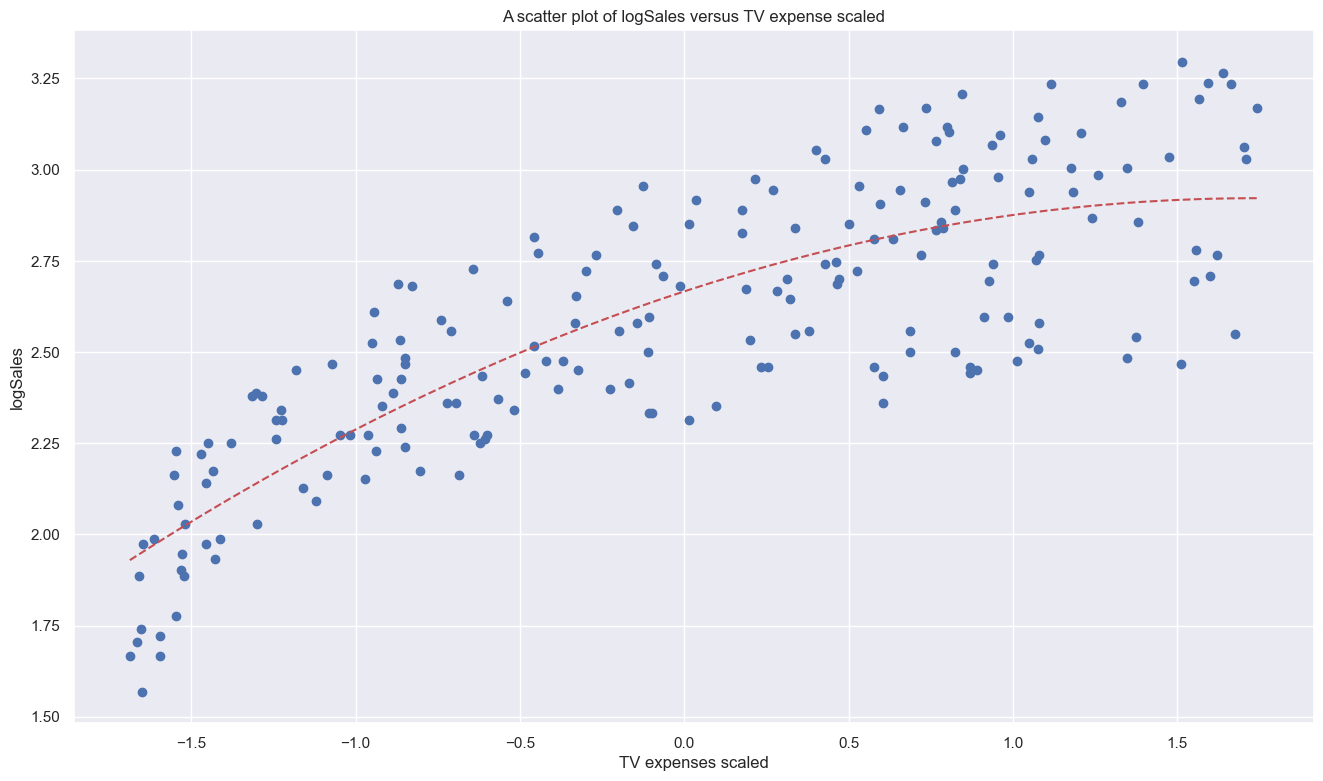

In [37]:
b2,b1,b0 = np.polyfit(________, __________, __________)
plt.scatter(___________,__________)
plt.plot(_________,______________________,'r--')
plt.xlabel('TV expenses scaled')
plt.ylabel('logSales')
plt.title('A scatter plot of logSales versus TV expense scaled')

### Question 5


**Ice cream consumption** (in pints per capita, variate pints) was measured over 30 successive four-week periods from 18 March 1951 to 11 July 1953. One of the variables thought to influence consumption was the mean temperature (◦F, variate temp).

Read the data

In [39]:
cream = pd.read_csv('cream2.csv')
cream.tail()

,pints,temp
25,0.359000,33
26,0.376000,41
27,0.416000,52
28,0.437000,64
29,0.785000,71


(a) Produce a scatterplot of pints versus temp. What is your comments?

Text(0.5, 1.0, 'A scatter plot of Consumption versus Mean Temperature')

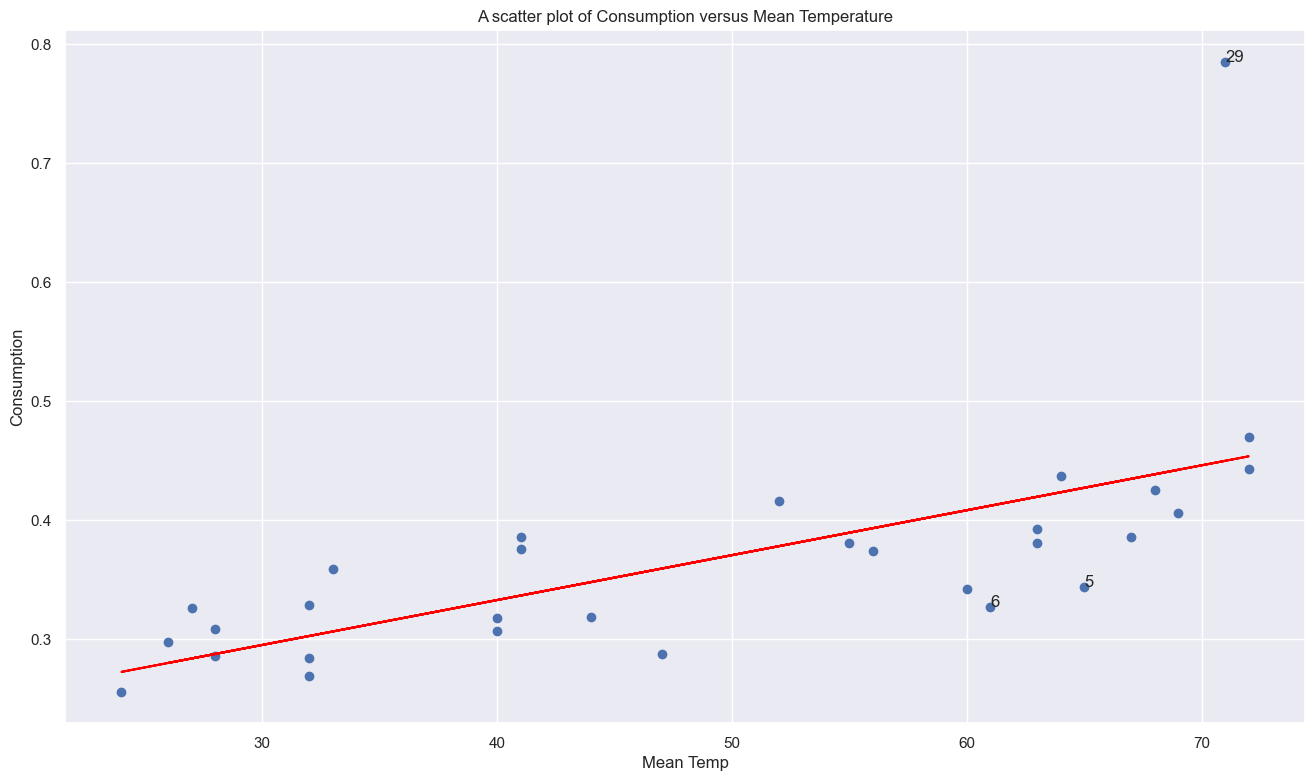

In [40]:
m, b = np.polyfit(_________, __________, 1)
e = 
labels = cream.index
e = e.values
X = 
Y = 
lpf = [labels[x] for x in np.argsort(np.abs(e))]
erf = [X[x] for x in np.argsort(np.abs(e))]
spf = [Y[x] for x in np.argsort(np.abs(e))]
plt.scatter(_____,______)
plt.plot(_______,________,color='red')
plt.xlabel('Mean Temp')
plt.ylabel('Consumption')
for c in range(1,4):
    plt.annotate(lpf[-c], (erf[-c], spf[-c]))
plt.title('A scatter plot of Consumption versus Mean Temperature')

Comments:



(b) Should the outlier(s) be removed? Comment.

In [41]:
#29 is the outlier
#try removing it to see if there is a large change in the regression line


Text(0.5, 1.0, 'A scatter plot of Ice Cream Consumption versus Mean Temperature')

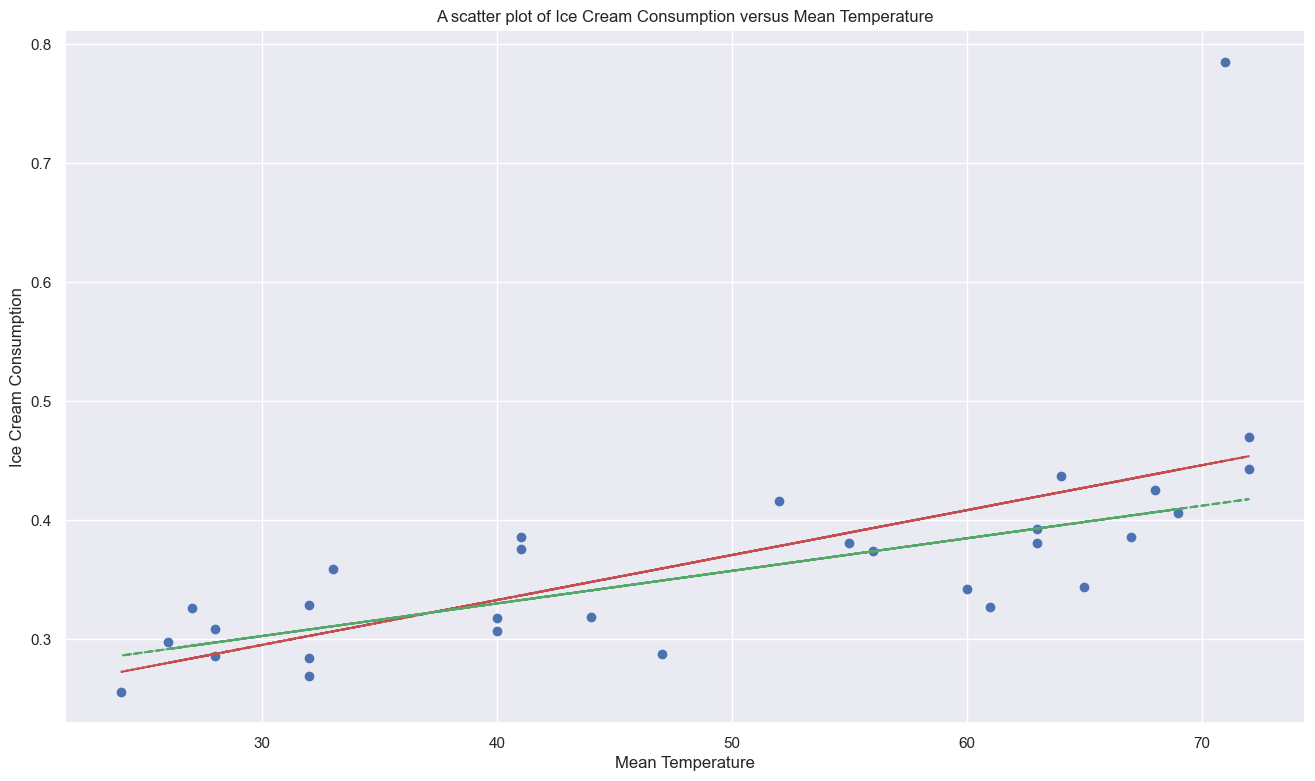

In [42]:
m1,b1 = np.polyfit(_______, ________, 1)
m2,b2 = np.polyfit(________,_________,1)
plt.scatter(_________,__________)
#red line = original data
plt.plot(_________,__________,'r--')
#green line = data without outlier(s)
plt.plot(_________,__________'g--')
plt.xlabel('Mean Temperature')
plt.ylabel('Ice Cream Consumption')
plt.title('A scatter plot of Ice Cream Consumption versus Mean Temperature')

Observations

(c) Produce the residual plots, and produce a plot of the residuals vs index sequence. Comment on the appropriateness of the simple linear regression model for these data.

**Residual plot**: residuals vs fitted values

Text(0.5, 1.0, 'residuals versus Fitted values')

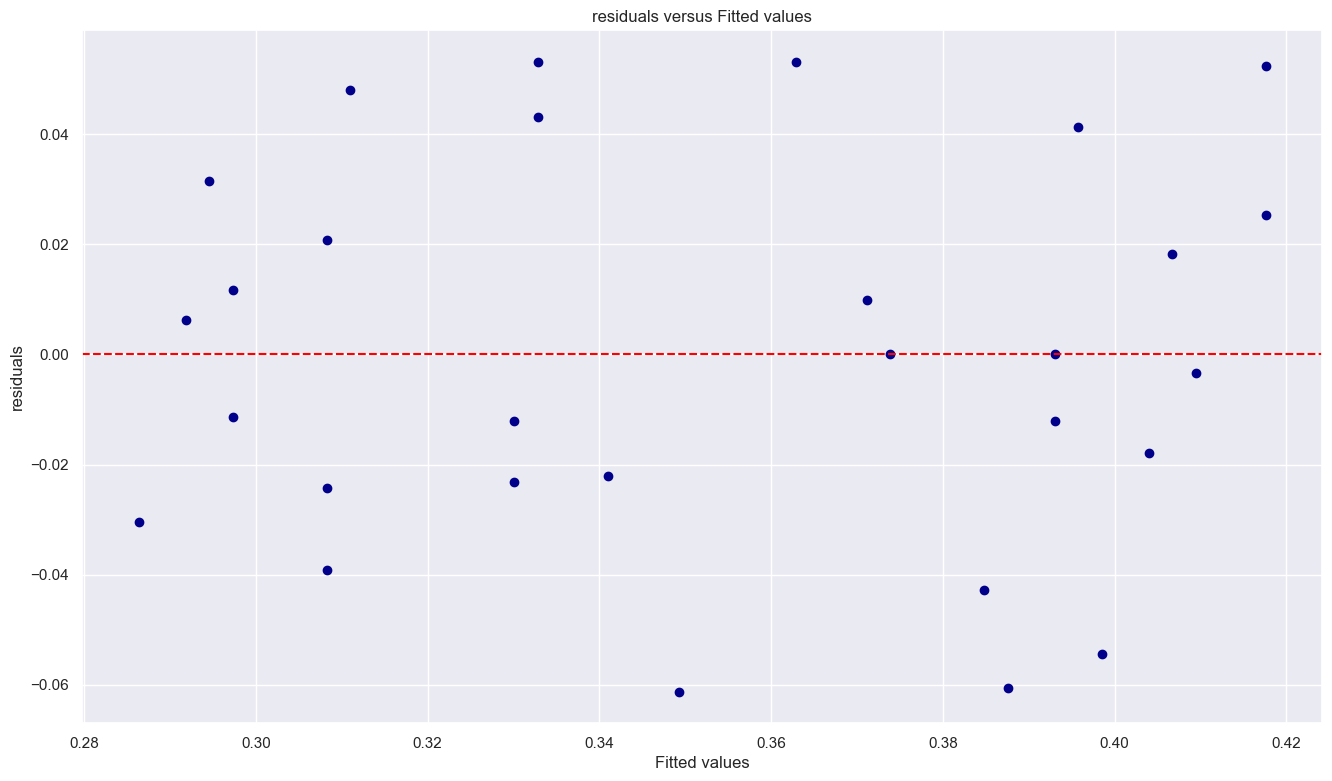

In [43]:
#assume that the outlier is removed.
cream2['resid'] = 
cream2['pred_pints'] = 
plt.scatter(_____________,__________________,color='darkblue')
plt.axhline(y=0.0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('residuals')
plt.title('residuals versus Fitted values')

**Residual plot**: residuals vs mean temp

Text(0.5, 1.0, 'residuals versus Mean temp')

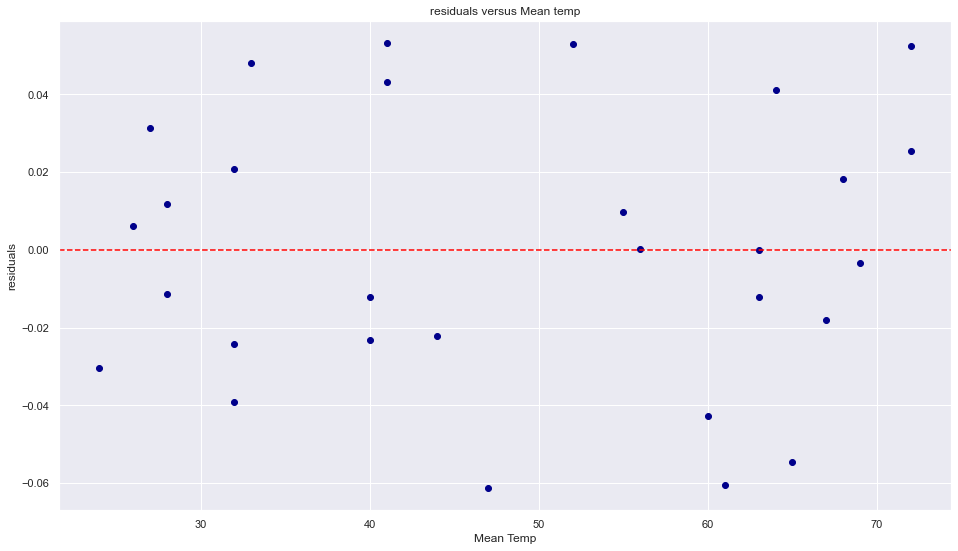

In [87]:
plt.scatter(___________,_______________,color='darkblue')
plt.axhline(y=0.0, color='red', linestyle='--')
plt.xlabel('Mean Temp')
plt.ylabel('residuals')
plt.title('residuals versus Mean temp')

Observations:

Check for normality of the residuals

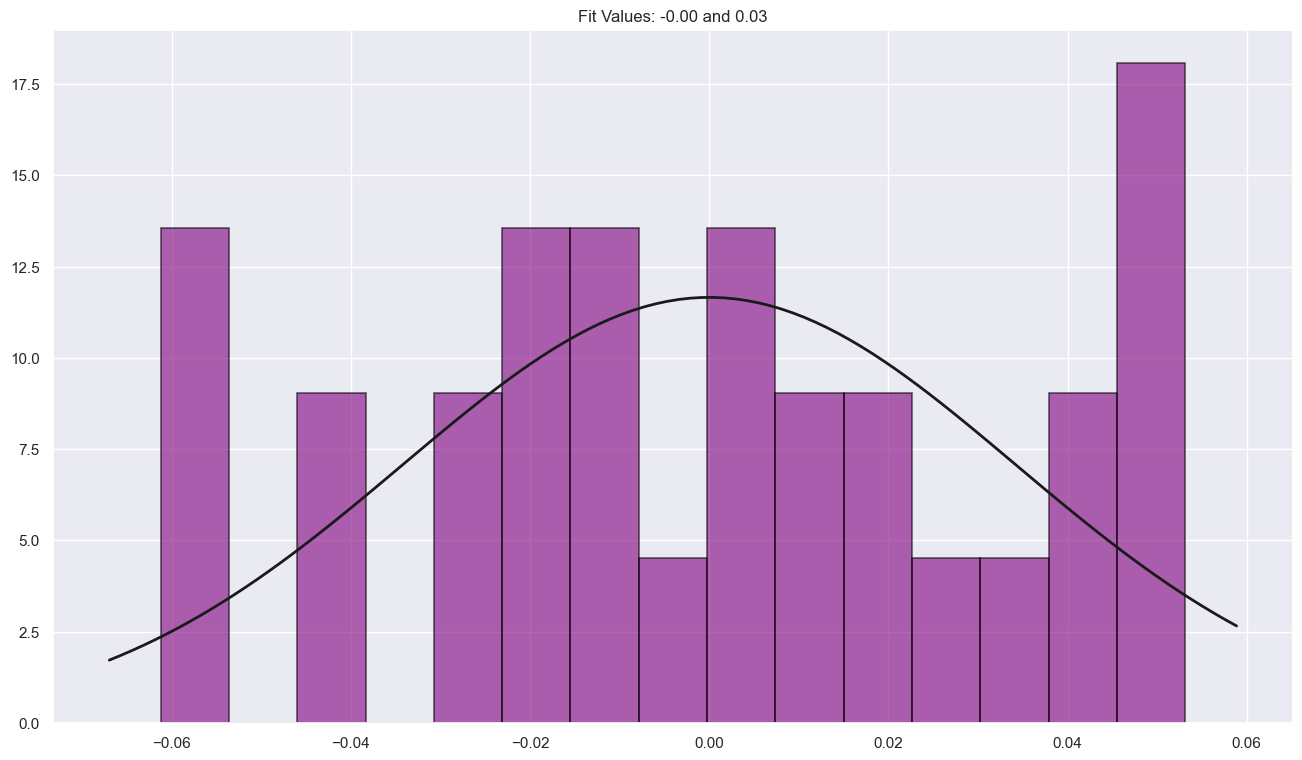

In [44]:
mu, std = norm.fit(_________________) 

# Plot the histogram of residuals.
plt.hist(_____________, bins=15, density=True, alpha=0.6, color='purple',edgecolor='black', linewidth=1.2)
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = 
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

Comment

**Residual plot in index order**

Text(0.5, 1.0, 'residuals versus Index')

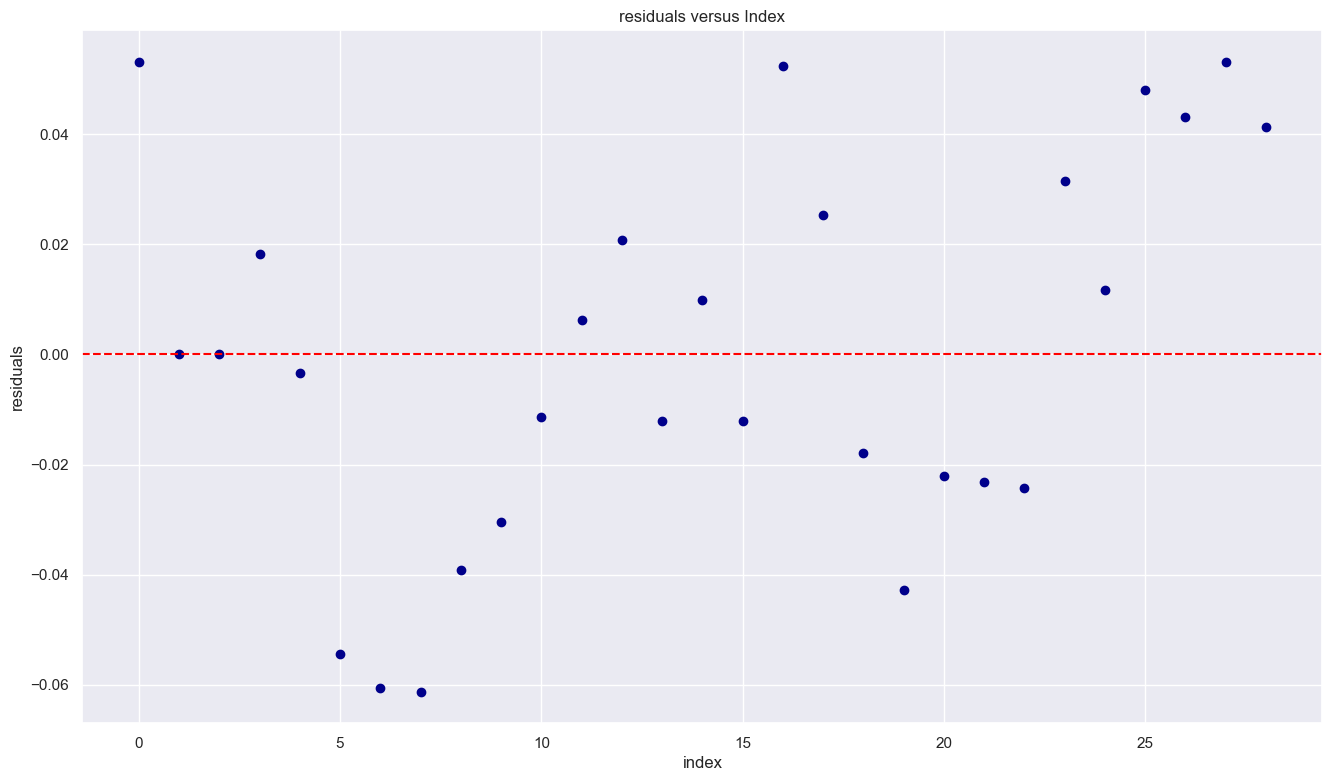

In [45]:
plt.scatter(____________,____________,color='darkblue')
plt.axhline(y=0.0, color='red', linestyle='--')
plt.xlabel('index')
plt.ylabel('residuals')
plt.title('residuals versus Index')

Comments:

array([[1.        , 0.64244706],
       [0.64244706, 1.        ]])

### Question 6 (optional)



housing.csv is a csv datafile contains the following columns:



- House Price



- House Size in sq.ft.




- State (where the house is located)




- Number of Rooms





- Year of Construction




Our objective is to build a linear regression model to predict the price of a house.

Read the data

In [95]:
data = pd.read_csv('housing.csv')
data.tail()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
15,900000,1325,TX,6,1997
16,730000,1350,TX,6,2000
17,750000,1600,TX,6,1992
18,650000,950,TX,2,1987
19,680000,1250,TX,4,2000


(a) Since Year of Constuction is a variable about when the house was built, we convert the variable into the house's age by substracting the Year of Construction by 2023.

In [96]:
data['Age'] = 2023 -____________________

(b) Since State is a categorical variable, use value_counts() to find out the number of categories it has.

In [97]:
data['State'].________________

State
IN    7
TX    7
NY    4
LA    2
Name: count, dtype: int64

(c) Use pandas get_dummies to convert the State variable into dummy variables.

In [98]:
data = pd.get_dummies(_______________, columns=________________,prefix=____________, dtype=int)

(d) Use LA as the reference variable. What is the effect on the regression coefficients of the other location dummy variables?

In [99]:
data = 
data.tail()

,House Price,House Size (sq.ft.),Number of Rooms,Year of Construction,Age,State_IN,State_NY,State_TX
15,900000,1325,6,1997,26,0,0,1
16,730000,1350,6,2000,23,0,0,1
17,750000,1600,6,1992,31,0,0,1
18,650000,950,2,1987,36,0,0,1
19,680000,1250,4,2000,23,0,0,1


Comment:

In [101]:
data.columns = ['House_Price','Size_sqft','Rooms','Year','Age','State_IN','State_NY','State_TX']

(e) Produce scatter plots between House Price and other numerical variables respectively. Describe your observations.

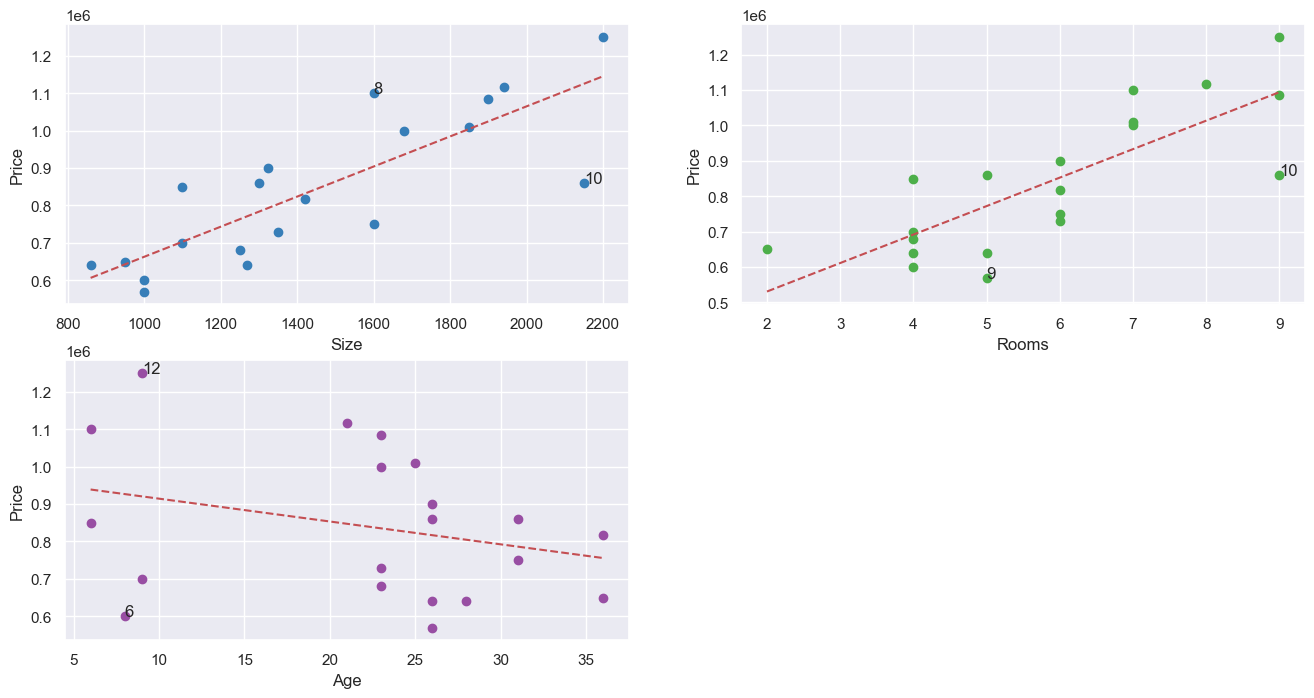

In [102]:
stat.plot_mscatter(data[['Size_sqft', 'Rooms', 'Age']].values,data['House_Price'].values,
                       [1,1,1],3,['Size', 'Rooms', 'Age'],'Price')

Observations:






(f) Regress House Price on all the variables (except Year of Construction). Comment on the fitness of the regression model.

In [103]:
#Use Abrasion as response
lm_housing = 
print(lm_housing.summary())

                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     7.243
Date:                Fri, 12 Jan 2024   Prob (F-statistic):            0.00146
Time:                        17:26:17   Log-Likelihood:                -257.08
No. Observations:                  20   AIC:                             528.2
Df Residuals:                      13   BIC:                             535.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.46e+05   1.37e+05      2.525      0.0

The fitted regression line is





Observations:







- Based on the regression model, the order of the House Price from the lowst to the highest is NY < IN < TX < LA. This sounds unreasonable because house prices in IN and TX should be lower than the corresponding house prices in NY. 

Histogram of the residuals

<Axes: >

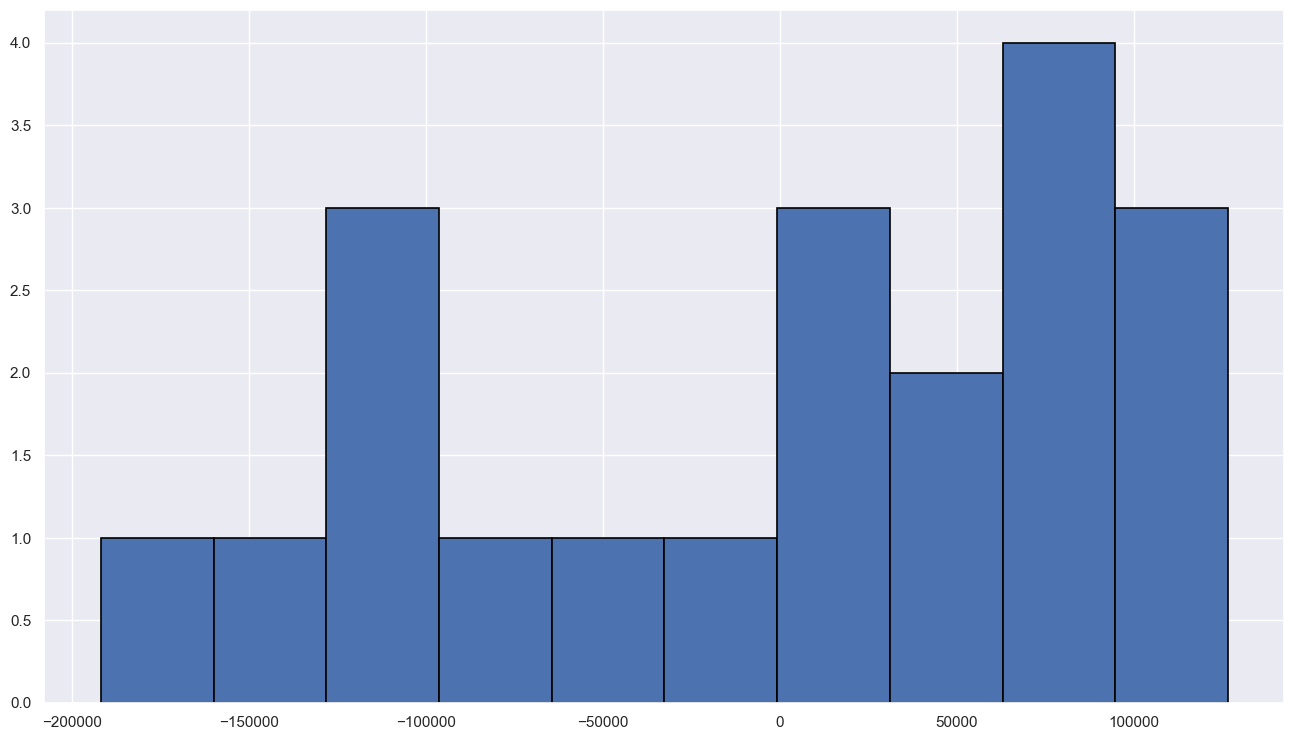

In [113]:
_____________________.hist(edgecolor='black', linewidth=1.2)

Observation

(g) Give interpretation of the parameters of the location dummy variables.

(h) By inspecting the confidence intervals of the parameters, what do you observe?

In [112]:
lm_housing.conf_int()

,0,1
Intercept,49997.075829,641985.570019
Size_sqft,-123.567939,700.810859
Rooms,-56910.965187,129172.096840
Age,-11762.770250,2603.195422
State_IN,-253449.389497,217369.372718
State_NY,-379330.002166,137856.582965
State_TX,-238686.809193,230259.457215


(h) Use the regression model to predict the price of a house situated in NY with size 1500 sq.ft., 5 rooms and was built in 2003. Give a $95\%$ prediction interval.

In [109]:
predictions = 
prediction_summary = predictions.summary_frame(0.05)

In [110]:
prediction_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,747243.883769,97754.101101,536058.987710,958428.779828,421594.079771,1072893.687767


The predicted House Price is about _______________